<a href="https://colab.research.google.com/github/dustinak80/Deep_Learning/blob/Duong/Copy_of_MATH6373_HW2_Duong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
#import packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from numpy.random import seed
seed(6373)
tf.random.set_seed(6373)
from sklearn.decomposition import PCA

# 1. Data Exploration

In [2]:
#Read input file
df_train=np.loadtxt('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/train.csv',
                    delimiter=",", dtype='float32',skiprows=1)
df_train[:5,:10]

array([[0.96880734, 0.89724773, 0.37431192, 0.        , 0.07339449,
        0.18715596, 0.23302752, 0.27522936, 0.27706423, 0.27155963],
       [1.        , 0.82451254, 0.47632313, 0.00557103, 0.17270195,
        0.3091922 , 0.40389973, 0.40389973, 0.4317549 , 0.42339832],
       [1.        , 0.5218855 , 0.03030303, 0.11111111, 0.10437711,
        0.11447811, 0.1010101 , 0.11447811, 0.1010101 , 0.10774411],
       [1.        , 0.5359712 , 0.5611511 , 0.57194245, 0.5683453 ,
        0.5215827 , 0.528777  , 0.47841728, 0.34172663, 0.19784173],
       [0.9866221 , 0.93534005, 0.8762542 , 0.8037904 , 0.7212932 ,
        0.6098105 , 0.49275362, 0.3522854 , 0.24972129, 0.17948718]],
      dtype=float32)

In [3]:
df_test=np.loadtxt('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/test.csv',
                   delimiter=",", dtype='float32',skiprows=1)
df_test[:5,:10]

array([[0.9662309 , 0.92156863, 0.8649238 , 0.8137255 , 0.72331154,
        0.6383442 , 0.5217865 , 0.39978212, 0.2788671 , 0.22004357],
       [0.87946427, 0.828125  , 0.74553573, 0.57589287, 0.41964287,
        0.3392857 , 0.33035713, 0.35714287, 0.4642857 , 0.39285713],
       [1.        , 0.92167103, 0.78851175, 0.31853786, 0.11488251,
        0.15665796, 0.16449086, 0.07310705, 0.06005222, 0.05744125],
       [0.8844847 , 0.8278596 , 0.7734994 , 0.7191393 , 0.6455266 ,
        0.5549264 , 0.4450736 , 0.33861834, 0.23216309, 0.17667045],
       [0.5862069 , 0.12539186, 0.        , 0.11285266, 0.1630094 ,
        0.12852664, 0.169279  , 0.1661442 , 0.20689656, 0.24451411]],
      dtype=float32)

In [0]:
# change the label to  0, 1, and 2
import seaborn as sns
y_train=df_train[:,187].copy()
y_train[y_train==4]=1
y_train=y_train.astype('int8')
#sns.distplot(y_train)
#plt.show()
#plt.hist(y_train)
#plt.show()
y_train[:10]
y_train2 = y_train.copy()

In [6]:
# apply the same thing for test set
y_test=df_test[:,187].copy()
y_test[y_test==4]=1
y_test=y_test.astype('int8')
#sns.distplot(y_test)
#plt.show()
#plt.hist(y_test)
#plt.show()
y_test[:10]

array([1, 2, 0, 1, 0, 2, 1, 0, 1, 0], dtype=int8)

In [7]:
X_train=df_train[:,:187].copy()
print(df_train.shape)
print(X_train.shape)
X_test=df_test[:,:187].copy()
print(df_test.shape)
print(X_test.shape)

(14975, 188)
(14975, 187)
(3744, 188)
(3744, 187)


# 2. Define MLP structure


# 3. Select 2 tentative sizes h for the hidden layer

## 3.1. h95



In [0]:
plt.rcParams['figure.figsize'] = (12,8)

0.9508588851895183
35


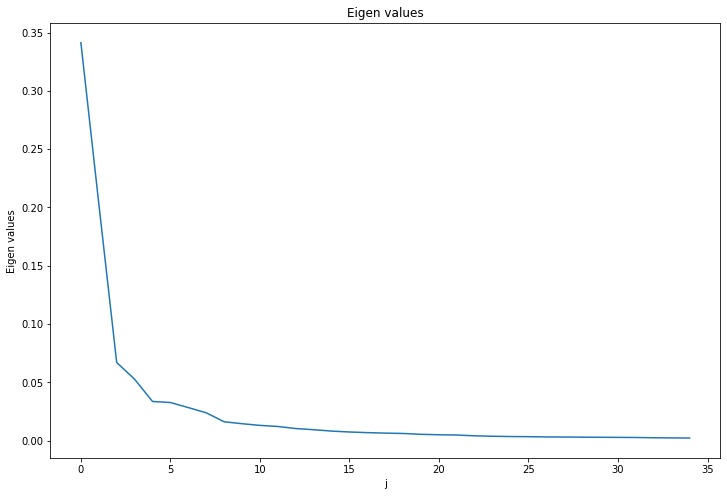

In [12]:
from sklearn.preprocessing import StandardScaler as SS
standardize=SS()
scaled_X_train = standardize.fit_transform(X_train)
pca = PCA(0.95) # apply pca for 95%
pca.fit(scaled_X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('j')
plt.ylabel('Eigen values')
plt.title('Eigen values')
print(sum(pca.explained_variance_ratio_))
h95 = pca.n_components_
print(h95)

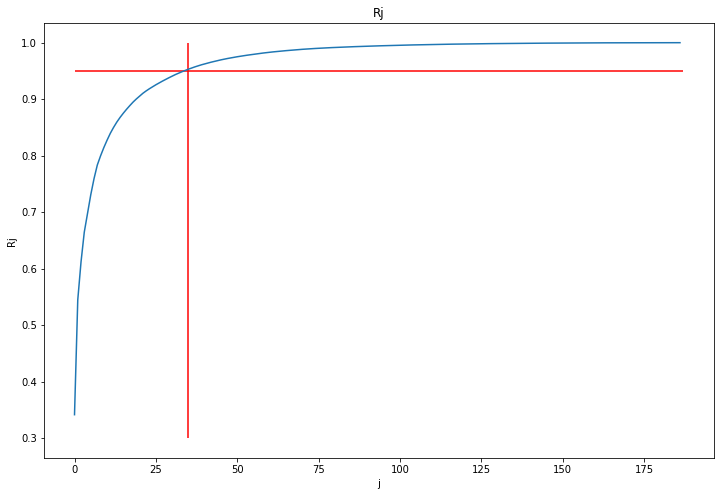

In [13]:
#Verify
pca = PCA(187)
pca.fit(scaled_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.95,0,187,'r')
plt.vlines(35,0.3,1,'r')
plt.xlabel('j')
plt.ylabel('Rj')
plt.title('Rj')
plt.show()

## 3.2 hL

In [14]:
hL=0
for i in range(3):
  Mj=scaled_X_train[y_train==i,:].copy()
  standardize=SS()
  Mj = standardize.fit_transform(Mj)  
  
  pca_Mij=PCA(0.95)
  pca_Mij.fit(Mj)
  hL+=pca_Mij.n_components_
  print(hL)

42
62
91


In [15]:
hL= 93
#for i in range(3):
#  pca_Mij=PCA(0.95)
#  pca_Mij.fit(X_train[y_train==i,:])
#  hL+=pca_Mij.n_components_
#  print(hL)
hL

93

# 5. Impact of various learning options

-dimension h  of H   
-batch size  
-initialization  
-gradient descent step size  

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import RandomNormal, RandomUniform, TruncatedNormal
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from time import time

In [0]:
#Just for running the def Model_Search() since I set these values equal to values
h = 35
Initializer = RandomNormal(mean=0.0, stddev=0.05, seed=6373)
B = 100
decay_rate = 0.4

In [0]:
### Use your own layer size and initializers. Refer to https://keras.io/initializers/. ####
def Model_Search(X_train, y_train, X_test, y_test, layerH_dim = h, Initializer = Initializer, B = B, decay_rate = decay_rate):
  
  #Build the Model for Keras
  layer1_dim=X_train.shape[1]
  layerH_dim=layerH_dim
  layer2_dim=3

  #D = layer1_dim*layerH_dim + layerH_dim + layerH_dim*layer2_dim + layer2_dim

  # Setup the layer
  model = Sequential()

  # From layer 1 to layer H, we use RELU
  # the initial Weights and Thresholds are kernel and bias
  # Random normal = random from normal distribution (mean=0.0, stddev=0.05, seed=None)
  model.add(Dense(layerH_dim, activation='relu', input_dim=layer1_dim, 
                kernel_initializer=Initializer,
                bias_initializer=Initializer))

  # From layer H to 2, then softmax
  model.add(Dense(layer2_dim, activation='softmax', 
                kernel_initializer=Initializer, 
                bias_initializer=Initializer))

  ###### Configure your own learning rate schedule and mini-batch size. #########

  # Choose batch size
  N=X_train.shape[0] # number of cases in train set
  # Our task is classification and we use cross entropy so
  loss_func = losses.CategoricalCrossentropy()

  # Define learning rate
  lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1,
                                                    decay_steps=N/B, 
                                                    decay_rate=np.exp(-decay_rate), 
                                                    staircase=True)

  # Because of using batch, Stochastic Gradient Descent optimizer is a must
  model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), 
              loss=loss_func,
              metrics=['accuracy'])

  # For saving the best model during the whole training process.
  checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

  #### Interrupt training if `val_loss` stops improving for over 10 epochs #######
  stop_learn= tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
  # Save the weight at the end of each epoch
  #weight_record = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                    # save_weights_only=True)
  epo=100

  # Fit the model
  Monitor = model.fit(X_train, y_train, 
                    epochs=epo, 
                    batch_size=B, 
                    callbacks=[checkpointer,stop_learn],
                    validation_data=(X_test, y_test),
                    verbose = 0
                    )
  
  return Monitor.history['loss'], Monitor.history['val_loss'], Monitor.history['accuracy'], Monitor.history['val_accuracy']

In [0]:
#plot
#plot
def plot(results):
  keys = results.keys()

  #Plot the plots
  count = 0
  max_acc = 0
  fig, ax = plt.subplots(2,1, figsize = (12,15))
  for i in keys:
    ax[0].plot(results[i]['loss'])
    ax[1].plot(results[i]['val_accuracy'])
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss (Average Cross Entropy)')
  ax[0].set_title('Loss per parameter')
  ax[0].legend(['{}'.format(i) for i in results.keys()])
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Validation Set Accuracy')
  ax[1].legend(['{}'.format(i) for i in results.keys()])

  for i in results.keys():
    #Get the best key (using the highest accuracy)
    key_max = max(results[i]['val_accuracy'])
    if key_max > max_acc:
      max_acc = key_max
      best_key = i

  for i in keys:
    print(min(results[i]['loss']), max(results[i]['val_accuracy']))
  
  plt.show()
  return best_key

#### Get the Y values in proper format

In [0]:
# Convert labels to one hot encodings
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

### Hidden Layer Dimensions:

In [0]:
h=[35, 93]

h_results = {}
delta_times = []
for i in h:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim= i)
  h_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time()-a]

0.4071268565666695 0.83653843
0.36960351412403764 0.8611111


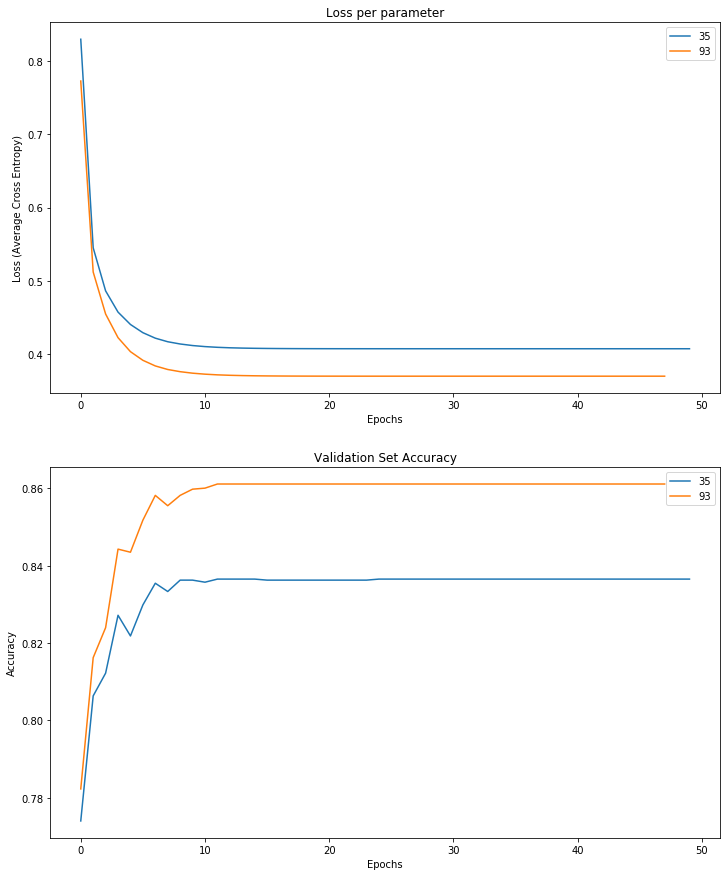

Number of Epochs: 48
Best Hidden Layer Dimension: 93
[14.142344951629639, 14.320007801055908]


In [22]:
best_h = plot(h_results)
print('Number of Epochs: {}\nBest Hidden Layer Dimension: {}'.format(len(h_results[i]['loss']), best_h))
print(delta_times)

In [0]:
##Run 1 for comparison of seed
#h_results[93]['loss']

In [0]:
##Run 2 for comparison of see
#h_results[93]['loss']

### Batch Size
-best Hidden Layer Dimension = 93 (50 Epochs before kicking out)

0.32342988374535747 0.8883547
0.36960351412403764 0.8611111
0.40837873446324435 0.8368056


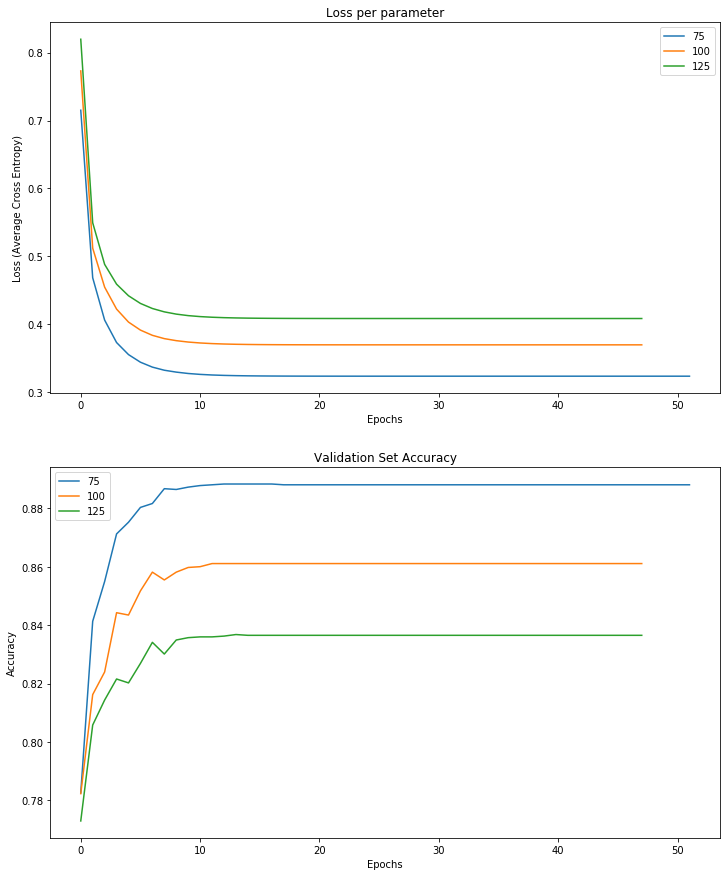

Number of Epochs: 48
Best Number of Batches Dimension: 75
[19.62861704826355, 14.173901557922363, 12.28887128829956]


In [23]:
#Play with Batch Values
B=[75, 100, 125]

B_results = {}
delta_times = []
for i in B:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = i)
  B_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time()-a]

best_B = plot(B_results)
print('Number of Epochs: {}\nBest Number of Batches Dimension: {}'.format(len(B_results[i]['loss']), best_B))
print(delta_times)

In [24]:
print('Number of Epochs: {}\nBest Number of Batches Dimension: {}'.format(len(B_results[i]['loss']), best_B))
print(delta_times)

Number of Epochs: 48
Best Number of Batches Dimension: 75
[19.62861704826355, 14.173901557922363, 12.28887128829956]


### Best Initilization Results
-best Hidden Layer Dimension = 93  (49 Epochs before kicking out)  
-best batch values = 75 (with 51 Epochs before kicking out)  

0.32342988374535747 0.8883547
0.3244935278601957 0.8819444
0.3435486197620879 0.8755342


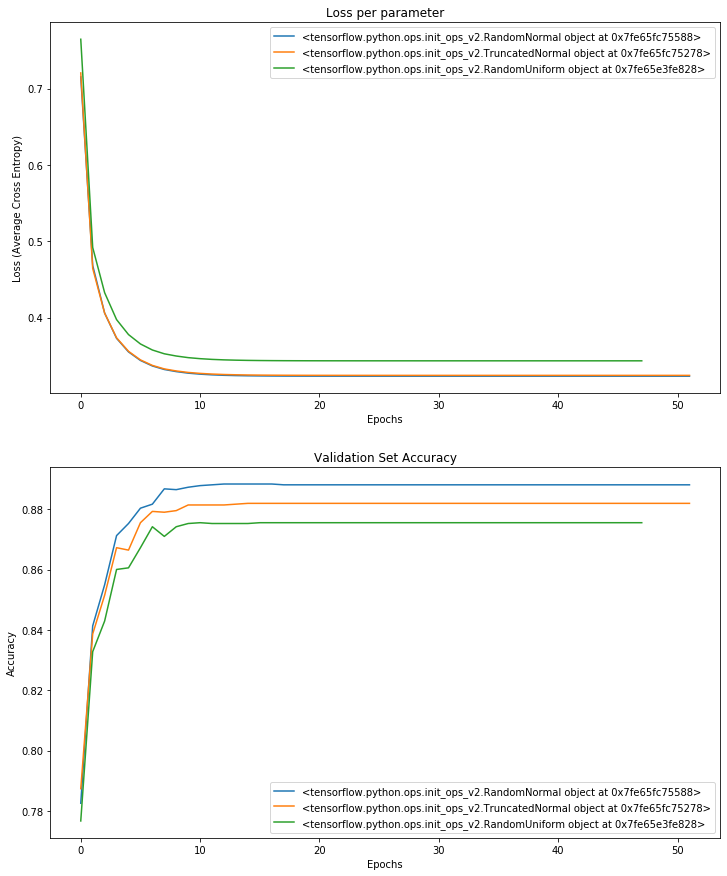

Number of Epochs: 48
Best Initialization Method Dimension: <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7fe65fc75588>
[19.40593147277832, 19.430395126342773, 17.866405248641968]


In [25]:
#Play with Initialization Methods
Initializer = [RandomNormal(mean=0.0, stddev=0.05, seed=6373),
               TruncatedNormal(mean=0.0, stddev=0.05, seed=6373),
               RandomUniform(minval=-0.05, maxval=0.05, seed=6373)]

Init_results = {}
delta_times = []
for i in Initializer:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = best_B, Initializer=i)
  Init_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time() - a]

best_Init = plot(Init_results)
print('Number of Epochs: {}\nBest Initialization Method Dimension: {}'.format(len(Init_results[i]['loss']), best_Init))
print(delta_times)

### Best Decay Rate Results
-best Hidden Layer Dimension = 93  (49 Epochs before kicking out)  
-best batch values = 75 (with 51 Epochs before kicking out)  
-best initialization method for params = RandomNormal (53 Epochs before kicking out)

0.0858328242122331 0.9639423
0.11932348049492987 0.95058763
0.14416505773248578 0.9423077


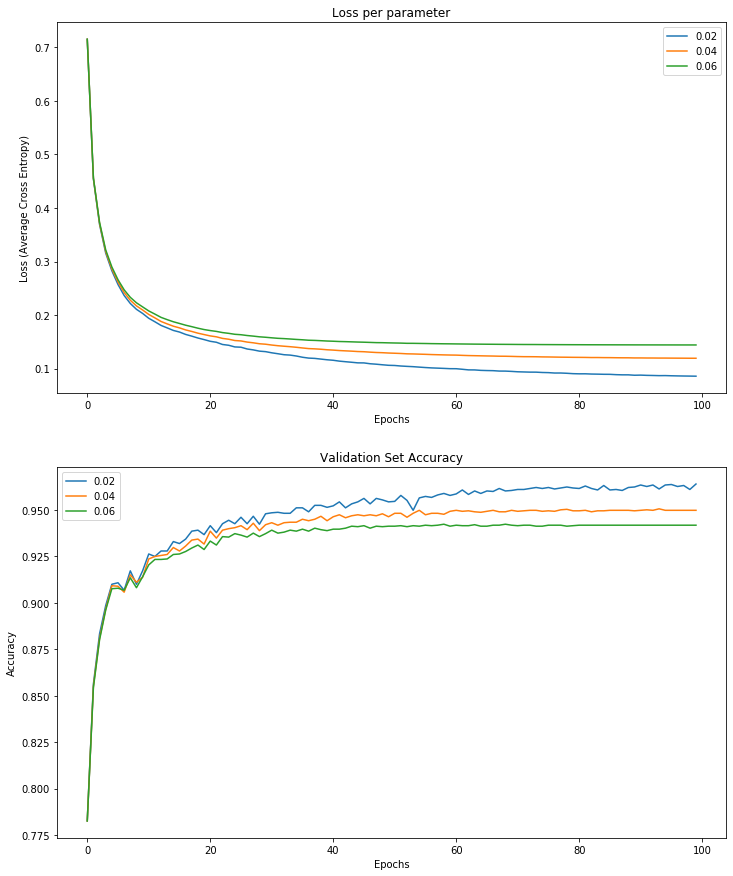

Number of Epochs: 100
Best Decay Rate Dimension: 0.02
[37.26661992073059, 37.68958878517151, 37.144221782684326]


In [26]:
#Play with Decay Rates
decay_rate = [.02, .04, .06]

decay_results = {}
delta_times = []
for i in decay_rate:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = best_B, Initializer=best_Init, decay_rate = i)
  decay_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time() - a]

best_decay = plot(decay_results)
print('Number of Epochs: {}\nBest Decay Rate Dimension: {}'.format(len(decay_results[i]['loss']), best_decay))
print(delta_times)

### Best Parameters
-best Hidden Layer Dimension = 93  (49 Epochs before kicking out)  
-best batch values = 75 (with 51 Epochs before kicking out)  
-best initialization method for params = RandomNormal (53 Epochs before kicking out)  
-best decay rate = 0.02 (Using all 100 Epochs)

# 4. Implementation

### Using the best results showed later in the search pattern

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import RandomNormal, RandomUniform, TruncatedNormal

# Use your own layer size and initializers. Refer to https://keras.io/initializers/.
layer1_dim=X_train.shape[1]
layerH_dim=best_h
#layerH_dim=35

layer2_dim=3

D = layer1_dim*layerH_dim + layerH_dim + layerH_dim*layer2_dim + layer2_dim

# Setup the layer
model = Sequential()

#Edit the initializers
Initializer = best_Init

# From layer 1 to layer H, we use RELU
# the initial Weights and Thresholds are kernel and bias
# Random normal = random from normal distribution (mean=0.0, stddev=0.05, seed=None)
model.add(Dense(layerH_dim, activation='relu', input_dim=layer1_dim, 
                kernel_initializer=Initializer,
                bias_initializer=Initializer))

# From layer H to 2, then softmax
model.add(Dense(layer2_dim, activation='softmax', 
                kernel_initializer=Initializer, 
                bias_initializer=Initializer))

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

- *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
- *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

#### learning rate with exponetial decay 

- initial_learning_rate: A scalar float32 or float64 Tensor or a Python number. The initial learning rate.
- decay_steps: A scalar int32 or int64 Tensor or a Python number. Must be positive. See the decay computation above.
- decay_rate: A scalar float32 or float64 Tensor or a Python number. The decay rate.
- staircase: Boolean. If True decay the learning rate at discrete intervals
name: String. Optional name of the operation. Defaults to 'ExponentialDecay'.

In [0]:
from tensorflow.keras import optimizers, losses

# Configure your own learning rate schedule and mini-batch size.

# Choose batch size
B = best_B
N=X_train.shape[0] # number of cases in train set
decay_rate = np.exp(-best_decay)
# Our task is classification and we use cross entropy so
loss_func = losses.CategoricalCrossentropy()

# Define learning rate
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1,
                                                    decay_steps=N/B, 
                                                    decay_rate=decay_rate, 
                                                    staircase=True)

# Because of using batch, Stochastic Gradient Descent optimizer is a must
model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), 
              loss=loss_func,
              metrics=['accuracy'])

 We will choose metrics later
 

In [0]:
from tensorflow.keras import callbacks

# For recording gradients and training loss over the whole training set
# at the end of each epoch.

class MyHistory(callbacks.Callback):
    # Set empty list for values we want to retrieve at the begining
    def on_train_begin(self, logs={}):
        self.grads = []
        self.gradsNorm = []
        self.train_loss = []
        self.test_loss = []
        self.weight=[]
        self.WC = []
        #Track some of the batch values
        self.bW = []
        self.b_WC = [] #change in weight size for every batch (page 3)
        self.bavCRE = [] #loss for each batch (page 3)
        self.bG = [] # batch Gradiend Descent (end of page 2)
        self.bGD = [] # Wants Size of batch gradient plotted each batch (page 3)

    # Define what values to keep at the end of each batch
    def on_batch_end(self, batch, logs):
        
        #Get the Batch Average CRE (Loss)
        self.bavCRE.append(logs.get('loss')) #plot
        
        # Weight
        modelWeights = [] # Vector W at the batch n 
        for layer in model.layers:
          layerWeights = []
          # Retrieve the weight and threshold from each layer
          for weight in layer.get_weights():
            layerWeights=np.concatenate([layerWeights,weight.flatten()])
          modelWeights=np.concatenate([modelWeights,layerWeights])
        # Store it 
        self.bW.append(modelWeights)

        if len(self.bW)>2:
          diff = (self.bW[-1]- self.bW[-2])
          self.bG.append( diff / decay_rate )
          self.b_WC.append( np.linalg.norm(diff)/np.linalg.norm(self.bW[-1]) ) #Plot
          self.bGD.append( np.linalg.norm(self.bG[-1]) / np.sqrt(D) ) #plot

    # Define what values we want to retrieve at the ending of epoch
    def on_epoch_end(self, epoch, logs={}):

        # Define gradient or Gi
        with tf.GradientTape() as tape:
          #train set
          y_pred = self.model(X_train)
          loss_value = loss_func(y_train,y_pred) # avCRE
          #test set
          test_y_pred = self.model(X_test)
          test_loss_value = loss_func(y_test, test_y_pred)

        #WHAT IS THIS DOING???
        grad = tape.gradient(loss_value, model.trainable_weights) # gradient(avCRE,W)
        self.grads.append(grad)

        self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grad])))
        
        # Weight
        modelWeights = [] # Vector W at the Epoch n 
        for layer in model.layers:
          layerWeights = []
          # Retrieve the weight and threshold from each layer
          for weight in layer.get_weights():
            layerWeights=np.concatenate([layerWeights,weight.flatten()])
          modelWeights=np.concatenate([modelWeights,layerWeights])
        # Store it 
        self.weight.append(modelWeights)

        #Get the value of loss and store it
        self.train_loss.append(loss_value.numpy())
        self.test_loss.append(test_loss_value.numpy())

GradsReal_loss = MyHistory()

# For saving the best model during the whole training process.

checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

- Train the model and store validation loss history in 'Monitor'.
- Be carefual that in Keras, the "loss" of each epoch (stored in 'Monitor.history['loss']') is calculated as the average of the losses of mini-batches in that epoch - bavCREn. 
- Vector Gn is stored in GradsReal_loss.grads
- For the real epoch loss over the whole training set, use 'GradsReal_loss.real_loss' instead. This is avCRE
- But it is safe to use 'Monitor.history['val_loss']' for validation losses.

In [30]:
# Interrupt training if `val_loss` stops improving for over 10 epochs
stop_learn= tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
# Save the weight at the end of each epoch
#weight_record = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                    # save_weights_only=True)
epo=100

# Fit the model
Monitor = model.fit(X_train, y_train, 
                    epochs=epo, 
                    batch_size=B, 
                    callbacks=[GradsReal_loss, checkpointer,stop_learn],
                    validation_data=(X_test, y_test),
                    )

Train on 14975 samples, validate on 3744 samples
Epoch 1/100
14975/14975 [==============================] - 1s 90us/sample - loss: 0.7152 - accuracy: 0.7211 - val_loss: 0.5389 - val_accuracy: 0.7826
Epoch 2/100
14975/14975 [==============================] - 1s 67us/sample - loss: 0.4545 - accuracy: 0.8284 - val_loss: 0.4230 - val_accuracy: 0.8563
Epoch 3/100
14975/14975 [==============================] - 1s 67us/sample - loss: 0.3693 - accuracy: 0.8666 - val_loss: 0.3426 - val_accuracy: 0.8833
Epoch 4/100
14975/14975 [==============================] - 1s 63us/sample - loss: 0.3158 - accuracy: 0.8878 - val_loss: 0.3003 - val_accuracy: 0.8985
Epoch 5/100
14975/14975 [==============================] - 1s 63us/sample - loss: 0.2827 - accuracy: 0.9010 - val_loss: 0.2708 - val_accuracy: 0.9100
Epoch 6/100
14975/14975 [==============================] - 1s 63us/sample - loss: 0.2571 - accuracy: 0.9080 - val_loss: 0.2504 - val_accuracy: 0.9108
Epoch 7/100
14975/14975 [==========================

### Plotting the Loss at the end of each Batch (n)

Text(0.5, 1.0, 'Average Batch Cross Entropy - h = hL= 35')

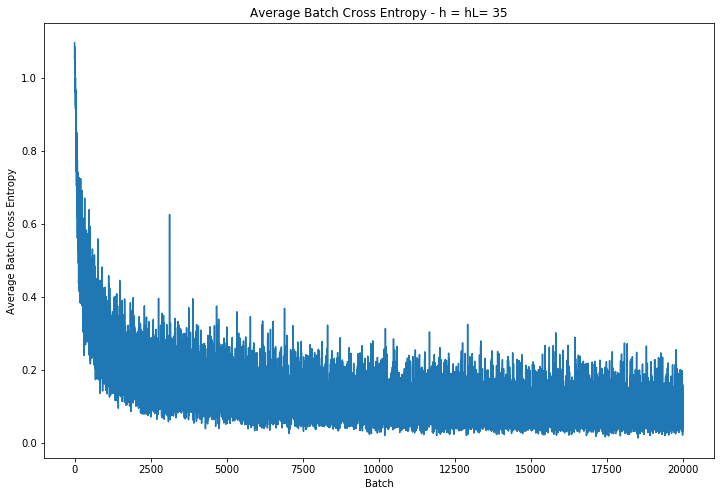

In [31]:
#At the end of each Batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.bavCRE)
ax.set_xlabel('Batch')
ax.set_ylabel('Average Batch Cross Entropy')
ax.set_title('Average Batch Cross Entropy - h = hL= 35')

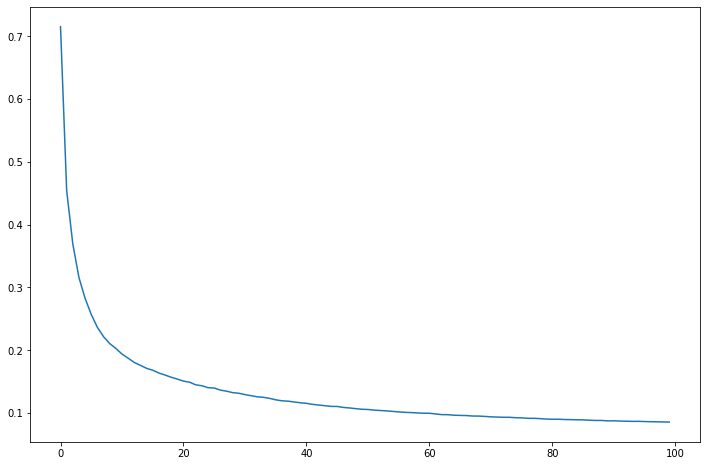

In [32]:
#At the end of each Epoch (m)
plt.plot(Monitor.history['loss']) #Loss of Training Set
#plt.plot(Monitor.history['val_loss']) #Validation Loss

### Plotting the size of weight change at the end of each Batch (n)

Text(0.5, 1.0, 'Weight Change Ratio - h = hL= 35')

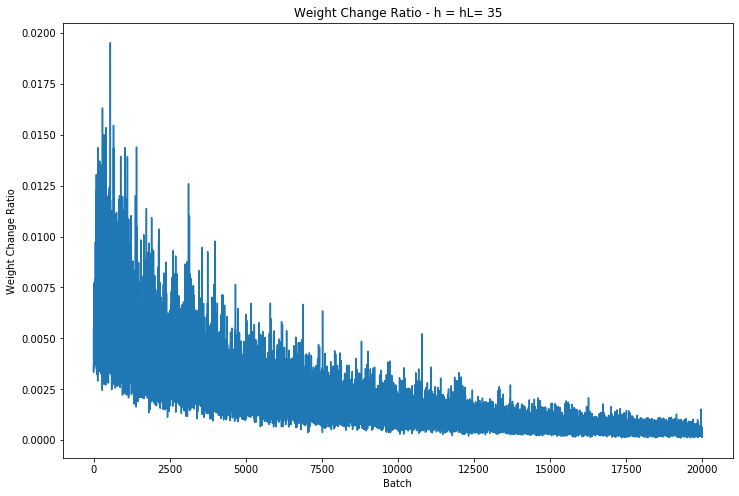

In [33]:
#At the end of each batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.b_WC)
ax.set_xlabel('Batch')
ax.set_ylabel('Weight Change Ratio')
ax.set_title('Weight Change Ratio - h = hL= 35')

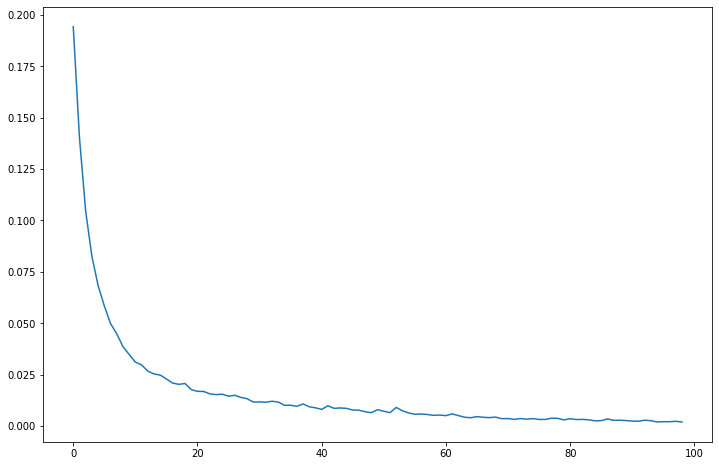

In [34]:
#At the end of Each Epoch(m)
from numpy import linalg as LA
def ratio(arr1,arr2):
  return(LA.norm(arr2-arr1)/LA.norm(arr1))
weight_ratio=[]
D=len(GradsReal_loss.weight[0])
epo_real=len(GradsReal_loss.weight) # the number of ran epoch
# it is <= epo because of interrupt learning
for i in range(epo_real-1):
  weight_ratio.append(ratio(GradsReal_loss.weight[i],GradsReal_loss.weight[i+1]))

plt.plot(weight_ratio)


### Plotting the ||G(n)|| at the end of each Batch (n)


In [35]:
GNn=[LA.norm(x) for x in GradsReal_loss.bG]
GNn[:10]

[0.036744324343871086,
 0.028945534434990077,
 0.032424389475610105,
 0.02251096376953749,
 0.030489353138986267,
 0.024579811112935765,
 0.0242627356003488,
 0.028277390146494732,
 0.03122446732132119,
 0.02882306505487449]

In [36]:
len(GradsReal_loss.bG[0])

17766

Text(0.5, 1.0, '||G(n)|| per batch - h = hL= 93')

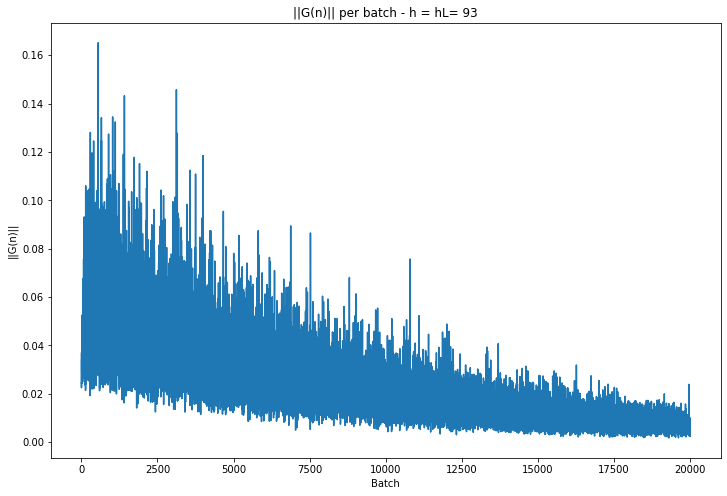

In [37]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GNn)
ax.set_xlabel('Batch')
ax.set_ylabel('||G(n)||')
ax.set_title('||G(n)|| per batch - h = hL= 93')

### Plotting the ||G(n)||/d at the end of each Batch (n)

Text(0.5, 1.0, '||G(n)||/d per batch - h=hL=35 ')

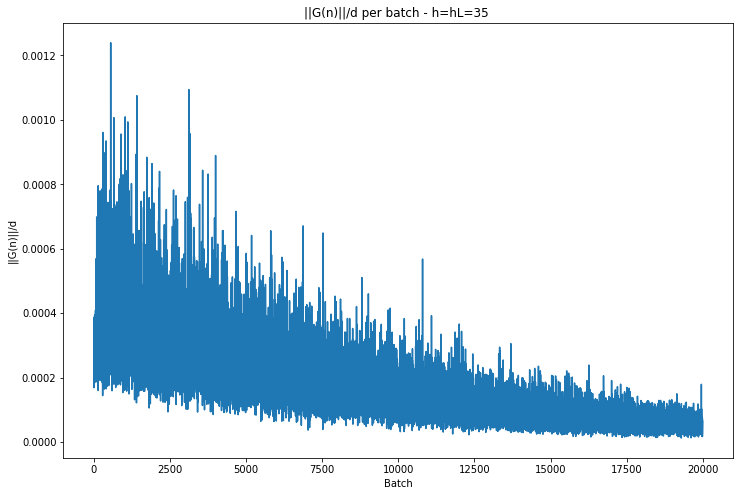

In [38]:
#At the end of each batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.bGD)
ax.set_xlabel('Batch')
ax.set_ylabel('||G(n)||/d')
ax.set_title('||G(n)||/d per batch - h=hL=35 ')

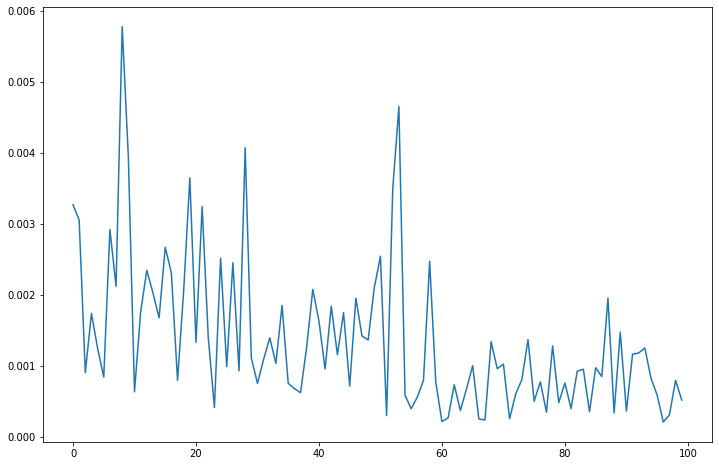

In [39]:
#At the end of each Epoch (m)
plt.plot(GradsReal_loss.gradsNorm/np.sqrt(D))

## Epoch Evaluations

val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data

In [0]:
#plt.plot(Monitor.history['accuracy']) #Accuracy of Training Set
#plt.plot(Monitor.history['val_accuracy']) #Accuracy of Validation Set

In [0]:
#plt.plot(GradsReal_loss.gradsNorm)

# 5. Performance analysis


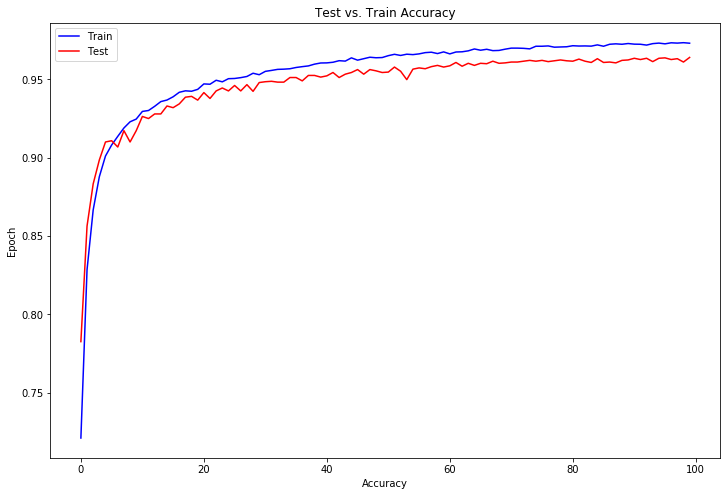

In [41]:
plt.figure(figsize = (12,8))
plt.plot(Monitor.history['accuracy'],color='blue',label='Train')
plt.plot(Monitor.history['val_accuracy'],color = 'red', label='Test')
plt.title('Test vs. Train Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend()
plt.show()

In [42]:
from tensorflow.keras.models import load_model

# Restore the best model and calculate confusion matrices.

model = load_model('BestModel.h5')
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

cfm_train=tf.math.confusion_matrix(np.argmax(y_train, axis=1), 
                               np.argmax(y_train_pred, axis=1),                  
                               num_classes=3).numpy()

cfm_test=tf.math.confusion_matrix(np.argmax(y_test, axis=1), 
                               np.argmax(y_test_pred, axis=1),
                               num_classes=3).numpy()
print(cfm_train)
print(cfm_test)
# Access gradients history by 'GradsReal_loss.grads' and 'GradsReal_loss.gradsNorm'.

[[5089   41   70]
 [  85 5024   36]
 [ 140   23 4467]]
[[1254   18   28]
 [  26 1251    9]
 [  43   11 1104]]


In [43]:
def acc_report(arr):
  nclass=arr.shape[0]
  report=pd.DataFrame(['0','1','2'],columns=['Class'])
  report['Correct_prediction']=([arr[i,i] for i in range(nclass)])
  report["Ncases"]=arr.sum(axis=1)
  report=report.append(report.sum(axis=0),ignore_index=True)
  report['Class'][3]="Total"
  report['Accuracy']=np.round(report.Correct_prediction/report.Ncases,3)
  report['LB']=np.round(report.Accuracy-1.96*np.sqrt(report.Accuracy*(1-report.Accuracy)/report.Ncases),3)
  report['UB']=np.round(report.Accuracy+1.96*np.sqrt(report.Accuracy*(1-report.Accuracy)/report.Ncases),3)
  report.iloc[:,1:3]=report.iloc[:,1:3].astype(int)
  return report
acc_report(cfm_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Class,Correct_prediction,Ncases,Accuracy,LB,UB
0,0,5089,5200,0.979,0.975,0.983
1,1,5024,5145,0.976,0.972,0.980
2,2,4467,4630,0.965,0.960,0.970
3,Total,14580,14975,0.974,0.971,0.977


In [44]:
acc_report(cfm_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Class,Correct_prediction,Ncases,Accuracy,LB,UB
0,0,1254,1300,0.965,0.955,0.975
1,1,1251,1286,0.973,0.964,0.982
2,2,1104,1158,0.953,0.941,0.965
3,Total,3609,3744,0.964,0.958,0.970


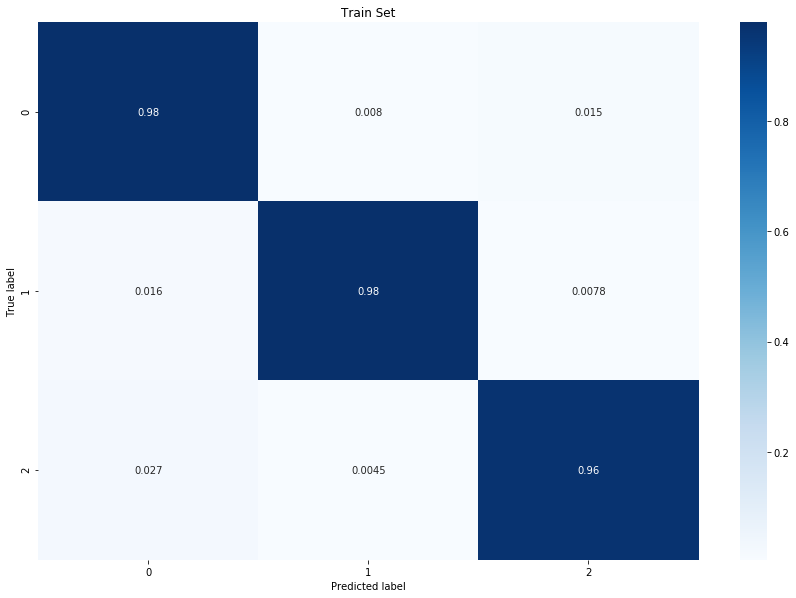

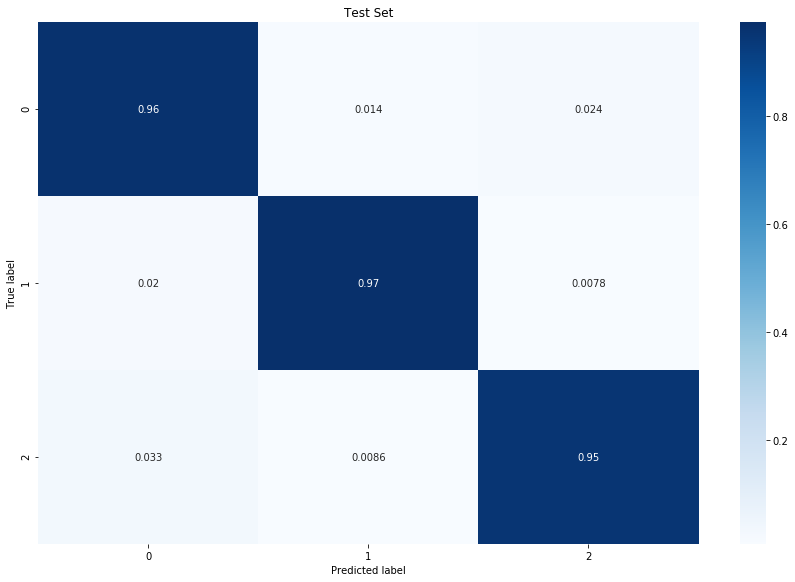

In [45]:
# a function to convert confusion matrix to percentage
def cfm2per(array):
  array=array/array.sum(axis=1)
  return(array)

# Turn to percentage and plot as heatmap
cfm_train=cfm2per(cfm_train)

sns.heatmap(cfm_train, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

cfm_test=cfm2per(cfm_test)

sns.heatmap(cfm_test, annot=True,cmap=plt.cm.Blues)
plt.title('Test Set')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 6. Analysis of hidden layer

In [0]:
Houtput = model.layers[0](X_train).numpy()

In [47]:
Houtput.shape

(14975, 93)

### PCA

In [48]:
Houtput = pd.DataFrame(model.layers[0](X_train).numpy())
abs(Houtput).sum()[abs(Houtput).sum() == 0]
#looks like 3 columns are completely 0
#Will have to fill the Nan values in correlation matrix

15    0.0
27    0.0
61    0.0
dtype: float32

In [0]:
#Drop the columns with all 0 values
Houtput2 = Houtput.drop(columns = [15, 27,61])

In [50]:
H_corr = Houtput2.corr()
print(H_corr.shape)

(90, 90)


In [51]:
#look at neurons with a correlation value greater than .90
top_tracker = {}
for i in range(len(H_corr+3)):
  if i in [15, 27, 61]:
    continue
  for j in range(len(H_corr+3)):
    if j in [15, 27, 61]:
      continue
    else:
      val = H_corr.loc[i,j]
    if val > .90:
      if val not in top_tracker.keys():
        top_tracker[val] = (i,j)

top_tracker.pop(1, None)
top_tracker

{0.9180883150931428: (18, 45),
 0.9189938997874838: (2, 33),
 0.9248932859863097: (50, 78),
 0.9265901568159268: (50, 69),
 0.9304733397519506: (41, 72),
 0.9309965719065106: (72, 80),
 0.9323116733253826: (18, 85),
 0.9533444942640208: (45, 85),
 0.9590655134192251: (73, 74),
 0.9593000246843041: (1, 60),
 0.983590680723904: (11, 38),
 0.9854483365470534: (69, 78),
 0.9856495921249123: (41, 80)}

In [0]:
#Eigen Values and Vectors
H_eig, H_eig_v = np.linalg.eig(H_corr)
#ratio of variance explained
H_ratio = np.cumsum(H_eig)/np.sum(H_eig)

Variance Explained by Projecting onto first 3 is 0.43


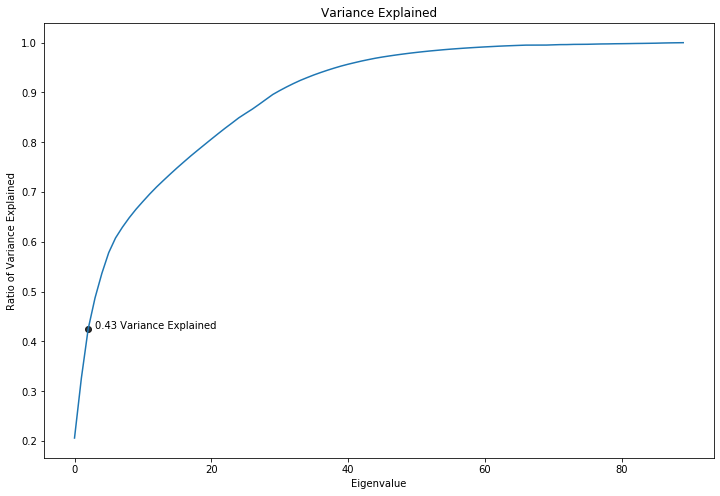

In [53]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(H_ratio)
ax.scatter(2, H_ratio[2], c = 'black', alpha = .8)
ax.set_xlabel('Eigenvalue')
ax.set_ylabel('Ratio of Variance Explained')
ax.text(x = 3, y = H_ratio[2], s = '{} Variance Explained'.format(round(H_ratio[2],2)))
ax.set_title('Variance Explained')

print('Variance Explained by Projecting onto first 3 is {}'.format(round(H_ratio[2],2)))

In [0]:
#Project
proj = np.matmul(Houtput2, H_eig_v).iloc[:, 0:3]

In [0]:
#Get Index of different groups
#print(y_test[1:10,:])
#print(y_test2[1:10])
y_train2 = pd.Series(y_train2)

#class 0 = 0 (Normal)
cl0_idx = y_train2[y_train2 == 0].index
#Class 1 = 4 (unclassified)
cl1_idx = y_train2[y_train2 == 1].index
#Class 2 = 2 (ventricular)
cl2_idx = y_train2[y_train2 == 2].index

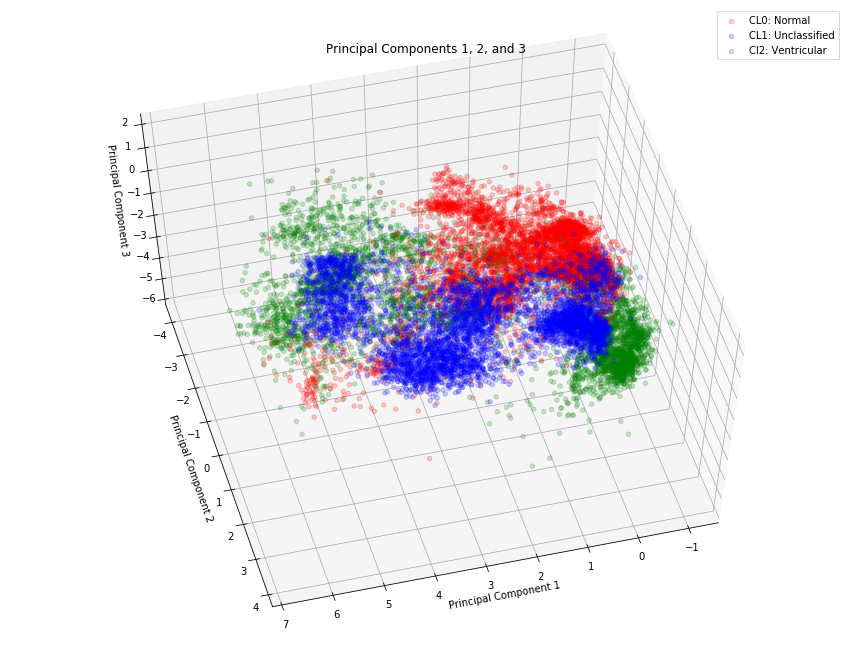

In [56]:
#Plot the 3d cluster by group
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(60, 75)
ax.set_title('Principal Components 1, 2, and 3')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.scatter(proj.loc[cl0_idx,0], proj.loc[cl0_idx,1], proj.loc[cl0_idx,2], c='r' , alpha = .2)
ax.scatter(proj.loc[cl1_idx,0], proj.loc[cl1_idx,1], proj.loc[cl1_idx,2], c='b', alpha = .2)
ax.scatter(proj.loc[cl2_idx,0], proj.loc[cl2_idx,1], proj.loc[cl2_idx,2], c='g', alpha = .2)
ax.legend(['CL0: Normal','CL1: Unclassified' ,'Cl2: Ventricular'])

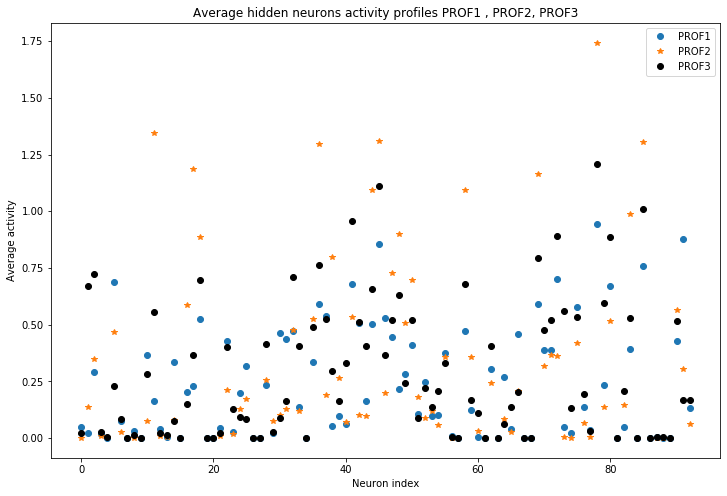

In [68]:
# Average activities of H
label_train=np.argmax(y_train, axis=1)
PROF1=np.mean(Houtput[label_train==0],axis=0)
plt.plot(PROF1,'o',label='PROF1')

PROF2=np.mean(Houtput[label_train==1],axis=0)
plt.plot(PROF2,'*',label='PROF2')

PROF3=np.mean(Houtput[label_train==2],axis=0)
plt.plot(PROF3,'ko',label='PROF3')
plt.xlabel('Neuron index')
plt.ylabel('Average activity')
plt.title('Average hidden neurons activity profiles PROF1 , PROF2, PROF3')
plt.legend()
plt.show()

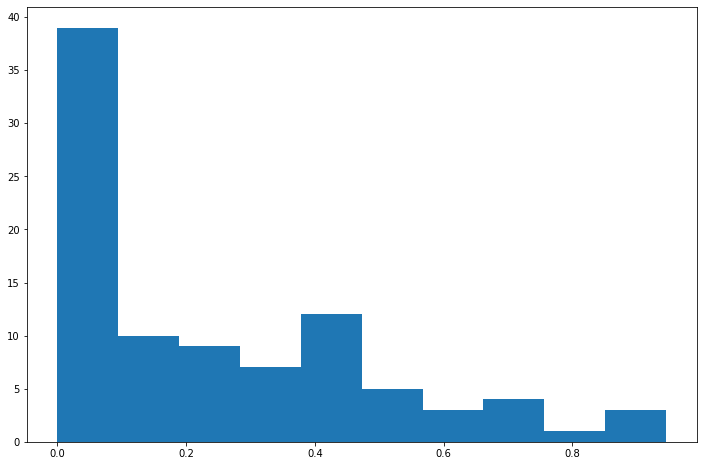

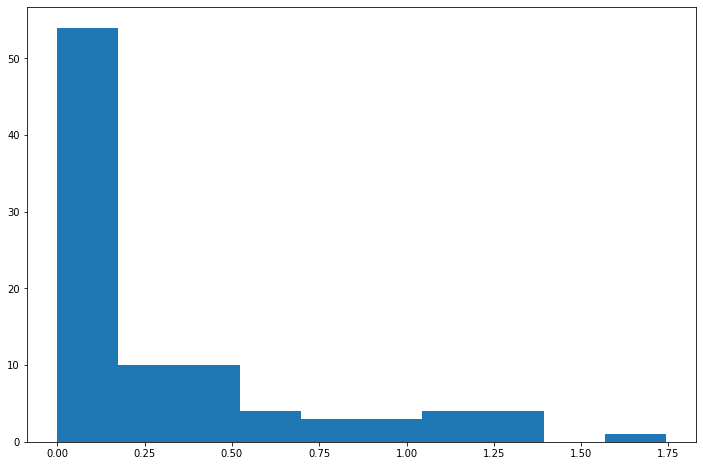

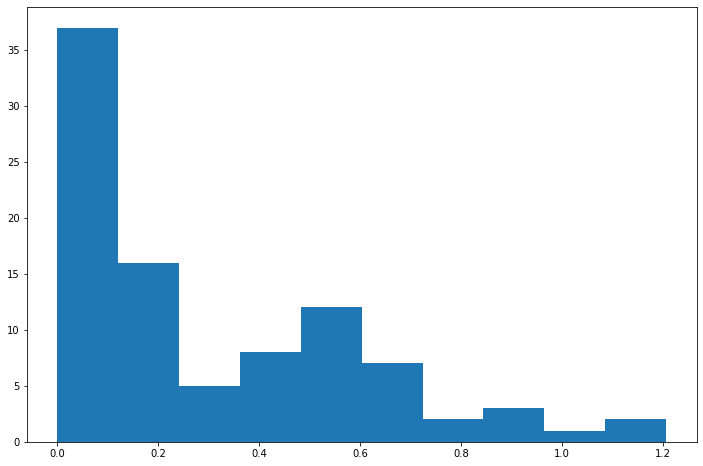

In [69]:
plt.hist(PROF1)
plt.show()
plt.hist(PROF2)
plt.show()
plt.hist(PROF3)
plt.show()

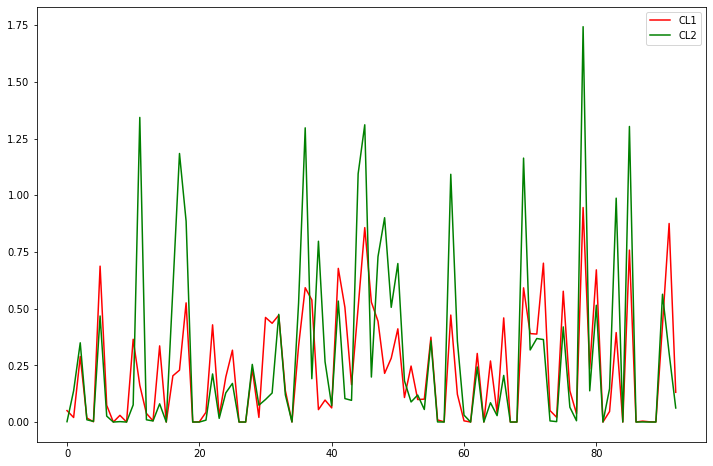

In [70]:
plt.plot(PROF1,'red',label="CL1")
plt.plot(PROF2,'green',label="CL2")
plt.legend()
plt.show()
#plt.plot(np.abs(PROF1-PROF2),label="CL1-CL2")
#plt.legend()
#plt.show()

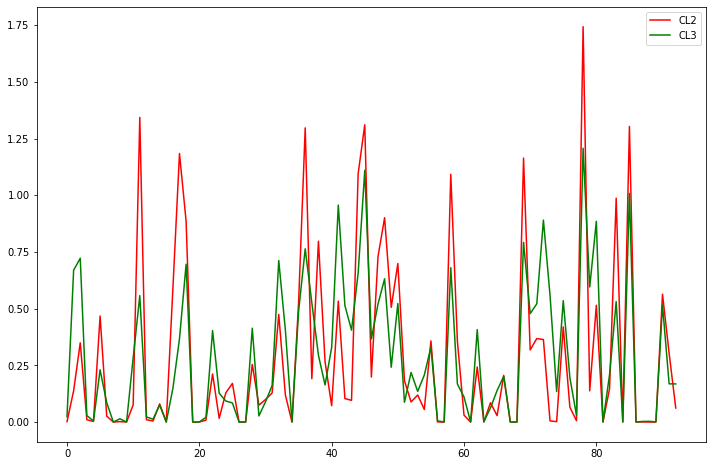

In [71]:
plt.plot(PROF2,'red',label="CL2")
plt.plot(PROF3,'green',label="CL3")
plt.legend()
plt.show()
#plt.plot(np.abs(PROF2-PROF3),label="CL2-CL3")
#plt.legend()
#plt.show()

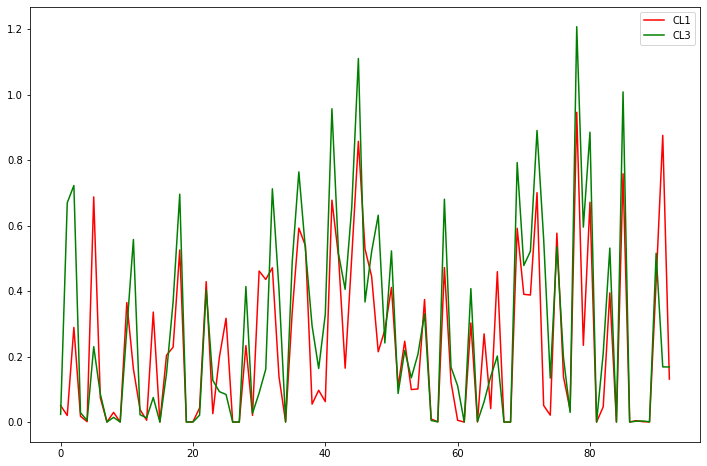

In [72]:
plt.plot(PROF1,'red',label="CL1")
plt.plot(PROF3,'green',label="CL3")
plt.legend()
plt.show()
#plt.plot(np.abs(PROF1-PROF3),label="CL1-CL3")
#plt.legend()
#plt.show()

In [73]:
#new code
count_neurons = 5#number of neurons
avg21 = (PROF1+PROF2)/2
norm_dif21 = np.abs(PROF2-PROF1) / avg21
norm_dif21.fillna(0,inplace=True)
#Top 5 neurons
print(norm_dif21.argsort()[-count_neurons:][::-1])
#Top 5 largest differences 
print(np.sort(norm_dif21)[-count_neurons:][::-1])

92     9
91     7
90    20
89    26
88    63
dtype: int64
[2. 2. 2. 2. 2.]


In [74]:
#new code
avg23 = (PROF2 + PROF3)/2
norm_dif23 = np.abs(PROF3 - PROF2) / avg23
norm_dif23.fillna(0,inplace=True)
#Top 5 neurons
print(norm_dif23.argsort()[-count_neurons:][::-1])
#Top 5 largest differences 
print(np.sort(norm_dif23)[-count_neurons:][::-1])

92    57
91    63
90    86
89    26
88    84
dtype: int64
[2. 2. 2. 2. 2.]


In [75]:
#new code
avg31 = (PROF1+PROF3)/2
norm_dif31 = np.abs(PROF3-PROF1) / avg31
norm_dif31.fillna(0,inplace=True)
#Top 5 neurons
print(norm_dif31.argsort()[-count_neurons:][::-1])
#Top 5 largest differences 
print(np.sort(norm_dif31)[-count_neurons:][::-1])

92    67
91    84
90    19
89     9
88     1
dtype: int64
[2.        2.        2.        1.9399775 1.8838755]
